<a href="https://colab.research.google.com/github/Niraj7667/ML-models/blob/main/outliers2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (10,6)

In [11]:
df = pd.read_csv('bhp.csv')
df.sample(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
4749,Indira Nagar,2 BHK,1145.0,2.0,100.0,2,8733
10520,other,2 Bedroom,1600.0,2.0,160.0,2,10000
9125,2nd Phase Judicial Layout,2 BHK,700.0,2.0,35.0,2,5000
7380,Ramamurthy Nagar,5 Bedroom,1350.0,5.0,120.0,5,8888
8294,Banaswadi,1 RK,527.0,1.0,35.0,1,6641


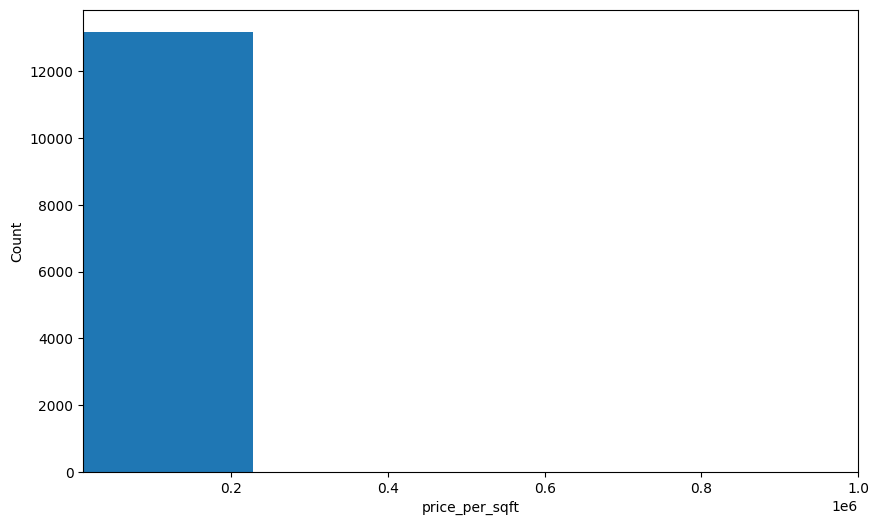

In [17]:
plt.hist(df.price_per_sqft,bins=50,rwidth=0.9)
plt.xlabel('price_per_sqft')
plt.ylabel('Count')
plt.xlim([11000, 1000000]) # Set x-axis limit to focus on smaller values
plt.show()

In [18]:

df.price_per_sqft.describe()

,price_per_sqft
count,1.320000e+04
mean,7.920337e+03
std,1.067272e+05
min,2.670000e+02
25%,4.267000e+03
50%,5.438000e+03
75%,7.317000e+03
max,1.200000e+07


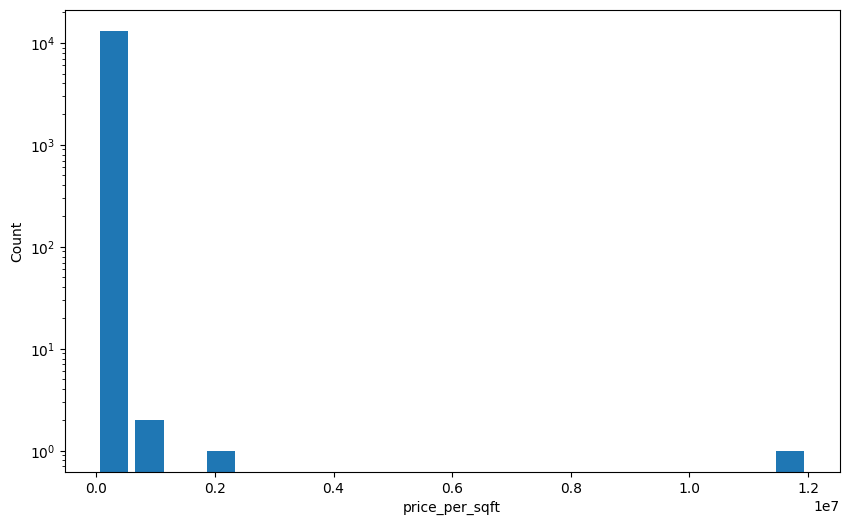

In [20]:
plt.hist(df.price_per_sqft,bins=20,rwidth=0.8)
plt.xlabel('price_per_sqft')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

In [21]:
lower_limit = df.price_per_sqft.quantile(0.001)
upper_limit = df.price_per_sqft.quantile(0.999)
print(lower_limit, upper_limit)

1366.184 50959.36200000098


In [23]:
outliers = df[(df.price_per_sqft < lower_limit) | (df.price_per_sqft > upper_limit)]
outliers.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
4924,other,7 BHK,5.0,7.0,115.0,7,2300000
12328,other,4 Bedroom,4350.0,8.0,2600.0,4,59770
9436,Indira Nagar,4 Bedroom,2400.0,5.0,1250.0,4,52083
3934,other,1 BHK,1500.0,1.0,19.5,1,1300
7862,JP Nagar,3 BHK,20000.0,3.0,175.0,3,875
7575,other,1 BHK,425.0,1.0,750.0,1,176470
7166,Yelahanka,1 Bedroom,26136.0,1.0,150.0,1,573
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
8300,Kengeri,1 BHK,1200.0,1.0,14.0,1,1166
798,other,4 Bedroom,10961.0,4.0,80.0,4,729


In [24]:
df2 = df[(df.price_per_sqft > lower_limit) & (df.price_per_sqft < upper_limit)]
df2.shape

(13172, 7)

In [25]:
df.shape

(13200, 7)

In [27]:
df.shape[0] - df2.shape[0]

28

(2) Now remove outliers using 4 standard deviation

In [28]:
max_limit = df2.price_per_sqft.mean() + 4*df2.price_per_sqft.std()
min_limit = df2.price_per_sqft.mean() - 4*df2.price_per_sqft.std()
max_limit , min_limit

(np.float64(23227.73653589429), np.float64(-9900.429065502549))

In [29]:
df2[(df2.price_per_sqft > max_limit) | (df2.price_per_sqft < min_limit)].sample(10)


,location,size,total_sqft,bath,price,bhk,price_per_sqft
9808,Uttarahalli,6 Bedroom,1200.00,6.0,330.0,6,27500
1281,Chamrajpet,9 Bedroom,4050.00,7.0,1200.0,9,29629
4645,other,10 Bedroom,2416.00,10.0,600.0,10,24834
6959,Raja Rajeshwari Nagar,4 Bedroom,1350.00,4.0,340.0,4,25185
7110,BEML Layout,3 Bedroom,1200.00,5.0,325.0,3,27083
8483,HSR Layout,8 Bedroom,800.00,8.0,285.0,8,35625
12640,other,3 BHK,2777.29,5.0,649.0,3,23368
4555,Judicial Layout,6 Bedroom,1200.00,6.0,300.0,6,25000
2371,other,5 Bedroom,3000.00,6.0,1000.0,5,33333
12631,Rajaji Nagar,5 Bedroom,2500.00,4.0,650.0,5,26000


In [30]:
df3 = df2[(df2.price_per_sqft < max_limit) & (df2.price_per_sqft > min_limit)]
df3.shape

(13047, 7)

In [31]:
df2.shape[0] - df3.shape[0]

125

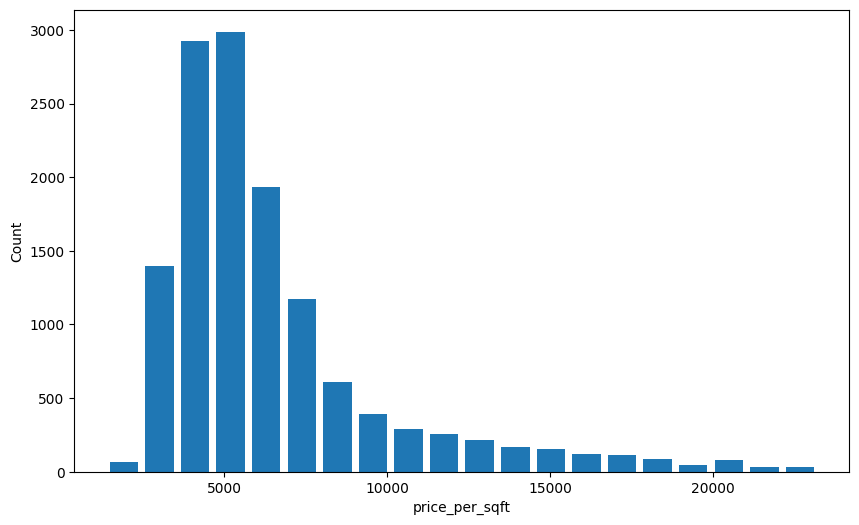

In [33]:
plt.hist(df3.price_per_sqft,bins=20,rwidth=0.8)
plt.xlabel('price_per_sqft')
plt.ylabel('Count')
plt.show()

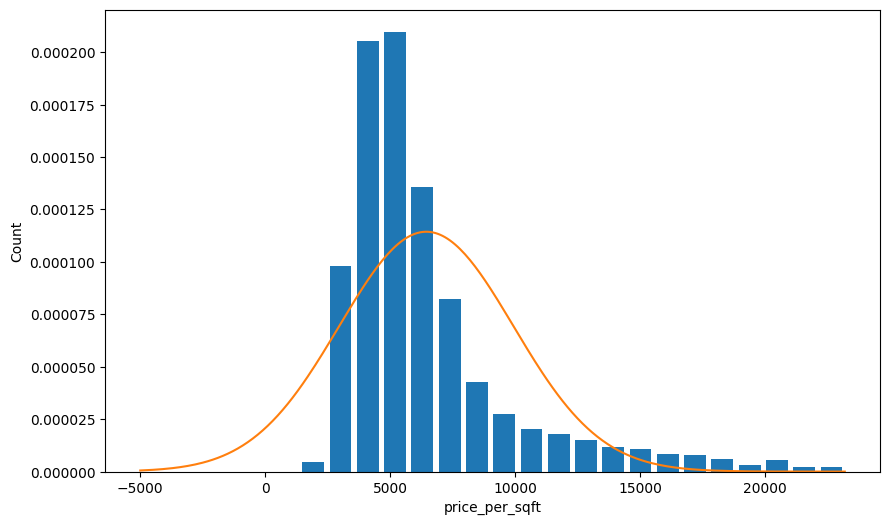

In [40]:
from scipy.stats import norm
import numpy as np

plt.hist(df3.price_per_sqft,bins=20,rwidth=0.8 , density = True)
plt.xlabel('price_per_sqft')
plt.ylabel('Count')


rng = np.arange(-5000, df3.price_per_sqft.max(), 100)
plt.plot(rng, norm.pdf(rng, df3.price_per_sqft.mean(), df3.price_per_sqft.std()))


(3) Now remove outliers using z score. Use z score of 4 as your thresold

In [41]:
df2['z-score'] = (df2.price_per_sqft - df2.price_per_sqft.mean())/df2.price_per_sqft.std()
df2.sample(10)

/tmp/ipython-input-2512047659.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['z-score'] = (df2.price_per_sqft - df2.price_per_sqft.mean())/df2.price_per_sqft.std()


,location,size,total_sqft,bath,price,bhk,price_per_sqft,z-score
12239,Vidyaranyapura,4 BHK,2400.0,5.0,135.00,4,5625,-0.250821
6749,BTM Layout,3 BHK,1600.0,3.0,112.00,3,7000,0.081223
1280,Binny Pete,1 BHK,665.0,1.0,50.75,1,7631,0.233601
5779,Hebbal Kempapura,2 BHK,1130.0,2.0,60.00,2,5309,-0.327130
3296,Ananth Nagar,3 BHK,1200.0,2.0,65.00,3,5416,-0.301291
9172,Balagere,2 BHK,1210.0,2.0,69.00,2,5702,-0.232226
12158,other,8 Bedroom,1150.0,8.0,70.00,8,6086,-0.139495
74,Kothannur,2 BHK,1206.0,2.0,48.23,2,3999,-0.643478
9176,Electronic City Phase II,3 BHK,1310.0,2.0,37.84,3,2888,-0.911769
12498,Kumaraswami Layout,7 Bedroom,3100.0,7.0,145.00,7,4677,-0.479750


In [44]:
outliers_z = df2[(df2['z-score'] > 4) | (df2['z-score'] < -4)]
outliers_z.shape

(125, 8)

In [45]:

outliers_z.sample(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft,z-score
5909,other,5 Bedroom,1240.0,5.0,300.0,5,24193,4.233098
4638,Munnekollal,43 Bedroom,2400.0,40.0,660.0,43,27500,5.031693
3816,Domlur,6 BHK,2400.0,4.0,600.0,6,25000,4.427977
4609,other,4 Bedroom,1800.0,5.0,500.0,4,27777,5.098585
8082,Nagarbhavi,4 Bedroom,1200.0,3.0,340.0,4,28333,5.232851


In [48]:
df4 = df2[(df2['z-score']>-4)&(df2['z-score']<4)]
df4.shape

(13047, 8)

In [49]:

df2.shape[0] - df4.shape[0]

125